In [152]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import CondensedNearestNeighbour
from itertools import product
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [153]:
# Load the data
df = pd.read_csv('FlareWatcher.csv')
df

,id,ts,user_id,uuid,Humidity[%],TVOC[ppb],eCO2[ppm],Pressure[hPa],flame_sensor
0,7,2024-04-23 01:48:09,santa_test_1,NaN,55.2683,0,400,1006.21,0
1,8,2024-05-08 00:52:39,Ua5f5a2a7fba3c4756d3aa39dbf670e6a,c9f02fdf-52ce-45bb-96e3-7a1ac611cd4f,51.4551,0,400,1010.98,0
2,9,2024-05-08 00:52:49,Ua5f5a2a7fba3c4756d3aa39dbf670e6a,c9f02fdf-52ce-45bb-96e3-7a1ac611cd4f,51.9602,0,400,1010.99,0
3,10,2024-05-08 00:52:59,Ua5f5a2a7fba3c4756d3aa39dbf670e6a,c9f02fdf-52ce-45bb-96e3-7a1ac611cd4f,51.9674,0,400,1010.95,0
4,11,2024-05-08 00:53:09,Ua5f5a2a7fba3c4756d3aa39dbf670e6a,c9f02fdf-52ce-45bb-96e3-7a1ac611cd4f,51.5762,0,400,1010.97,0
...,...,...,...,...,...,...,...,...,...
454,462,2024-05-10 15:16:12,Ua5f5a2a7fba3c4756d3aa39dbf670e6a,c9f02fdf-52ce-45bb-96e3-7a1ac611cd4f,64.3661,0,400,1006.93,0
455,463,2024-05-10 15:16:46,Ua5f5a2a7fba3c4756d3aa39dbf670e6a,c9f02fdf-52ce-45bb-96e3-7a1ac611cd4f,64.9854,0,400,1006.88,0
456,464,2024-05-10 15:17:28,Ua5f5a2a7fba3c4756d3aa39dbf670e6a,c9f02fdf-52ce-45bb-96e3-7a1ac611cd4f,65.5650,0,400,1006.96,0
457,465,2024-05-10 15:18:17,Ua5f5a2a7fba3c4756d3aa39dbf670e6a,c9f02fdf-52ce-45bb-96e3-7a1ac611cd4f,65.7457,0,401,1006.91,0


In [154]:
df.columns

Index(['id', 'ts', 'user_id', 'uuid', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Pressure[hPa]', 'flame_sensor'],
      dtype='object')

In [155]:
# check null value
df.isnull().sum()


id               0
ts               0
user_id          0
uuid             1
Humidity[%]      0
TVOC[ppb]        0
eCO2[ppm]        0
Pressure[hPa]    0
flame_sensor     0
dtype: int64

In [156]:
# drop null value
df = df.dropna()
df

,id,ts,user_id,uuid,Humidity[%],TVOC[ppb],eCO2[ppm],Pressure[hPa],flame_sensor
1,8,2024-05-08 00:52:39,Ua5f5a2a7fba3c4756d3aa39dbf670e6a,c9f02fdf-52ce-45bb-96e3-7a1ac611cd4f,51.4551,0,400,1010.98,0
2,9,2024-05-08 00:52:49,Ua5f5a2a7fba3c4756d3aa39dbf670e6a,c9f02fdf-52ce-45bb-96e3-7a1ac611cd4f,51.9602,0,400,1010.99,0
3,10,2024-05-08 00:52:59,Ua5f5a2a7fba3c4756d3aa39dbf670e6a,c9f02fdf-52ce-45bb-96e3-7a1ac611cd4f,51.9674,0,400,1010.95,0
4,11,2024-05-08 00:53:09,Ua5f5a2a7fba3c4756d3aa39dbf670e6a,c9f02fdf-52ce-45bb-96e3-7a1ac611cd4f,51.5762,0,400,1010.97,0
5,12,2024-05-08 00:53:19,Ua5f5a2a7fba3c4756d3aa39dbf670e6a,c9f02fdf-52ce-45bb-96e3-7a1ac611cd4f,51.4966,16,400,1010.96,0
...,...,...,...,...,...,...,...,...,...
454,462,2024-05-10 15:16:12,Ua5f5a2a7fba3c4756d3aa39dbf670e6a,c9f02fdf-52ce-45bb-96e3-7a1ac611cd4f,64.3661,0,400,1006.93,0
455,463,2024-05-10 15:16:46,Ua5f5a2a7fba3c4756d3aa39dbf670e6a,c9f02fdf-52ce-45bb-96e3-7a1ac611cd4f,64.9854,0,400,1006.88,0
456,464,2024-05-10 15:17:28,Ua5f5a2a7fba3c4756d3aa39dbf670e6a,c9f02fdf-52ce-45bb-96e3-7a1ac611cd4f,65.5650,0,400,1006.96,0
457,465,2024-05-10 15:18:17,Ua5f5a2a7fba3c4756d3aa39dbf670e6a,c9f02fdf-52ce-45bb-96e3-7a1ac611cd4f,65.7457,0,401,1006.91,0


In [157]:
df.isnull().sum()

id               0
ts               0
user_id          0
uuid             0
Humidity[%]      0
TVOC[ppb]        0
eCO2[ppm]        0
Pressure[hPa]    0
flame_sensor     0
dtype: int64

In [158]:
# drop some columns that are not useful
to_drop = ["id", "ts", "user_id", "uuid"]
df = df.drop(to_drop, axis=1)
df

,Humidity[%],TVOC[ppb],eCO2[ppm],Pressure[hPa],flame_sensor
1,51.4551,0,400,1010.98,0
2,51.9602,0,400,1010.99,0
3,51.9674,0,400,1010.95,0
4,51.5762,0,400,1010.97,0
5,51.4966,16,400,1010.96,0
...,...,...,...,...,...
454,64.3661,0,400,1006.93,0
455,64.9854,0,400,1006.88,0
456,65.5650,0,400,1006.96,0
457,65.7457,0,401,1006.91,0


# Explore and data cleaning

In [159]:
# check the data type
df.dtypes

Humidity[%]      float64
TVOC[ppb]          int64
eCO2[ppm]          int64
Pressure[hPa]    float64
flame_sensor       int64
dtype: object

In [160]:
# see the unique values of each column
for col in df.columns:
    print(col, df[col].unique())

Humidity[%] [51.4551 51.9602 51.9674 51.5762 51.4966 52.0655 52.395  51.9404 52.3283
 52.1809 51.9233 51.9916 51.718  51.0096 51.1227 51.386  51.3695 51.219
 51.2165 51.1296 51.1944 51.2602 51.1928 51.3242 51.7728 51.4808 51.6499
 51.7726 51.658  51.6646 51.4585 51.8073 51.4995 51.2794 51.2952 51.2947
 51.1407 51.2884 51.407  51.1969 51.5787 51.4726 51.9746 51.5517 51.5116
 51.5075 51.5922 51.5935 51.4424 51.7263 51.5625 51.0777 51.4012 51.3436
 51.9566 51.9824 51.621  51.418  51.5256 51.7934 51.9417 51.9003 52.0844
 52.5242 51.7556 51.8614 51.6488 51.8802 51.9205 52.446  52.2971 51.9255
 52.1446 52.5654 52.1752 52.0793 52.1275 51.648  51.507  51.5244 51.758
 51.632  51.6001 51.8635 51.9313 51.7517 52.0309 51.5381 51.4463 51.5606
 51.4139 51.2848 51.2118 51.3875 51.3273 51.4478 51.1423 51.1079 50.9442
 50.9106 50.9258 51.0103 51.1101 51.4221 51.3769 51.7419 51.7526 51.7485
 51.7715 51.446  51.4284 51.3652 51.2535 51.2877 51.4204 51.6874 51.4275
 51.4505 51.4578 51.4852 51.6193 52.1977 

In [161]:
# see statistics of the data
df.describe()
# from the statistics, we can see that some value is different from the unique values in the TVOC[ppb]

,Humidity[%],TVOC[ppb],eCO2[ppm],Pressure[hPa],flame_sensor
count,458.000000,458.000000,458.000000,458.000000,458.000000
mean,58.098573,7226.502183,461.290393,1009.250153,0.096070
std,7.790662,19517.302853,64.535512,1.769462,0.295009
min,49.932100,0.000000,400.000000,1005.570000,0.000000
25%,51.324975,0.000000,404.250000,1007.900000,0.000000
50%,51.963800,17.000000,447.000000,1010.550000,0.000000
75%,65.951275,59.000000,500.000000,1010.710000,0.000000
max,76.729600,60000.000000,940.000000,1011.000000,1.000000


In [162]:
# plot box plot to see the distribution of each column from plotly
for col in df.columns:
    fig = px.box(df, y=col)
    fig.show()


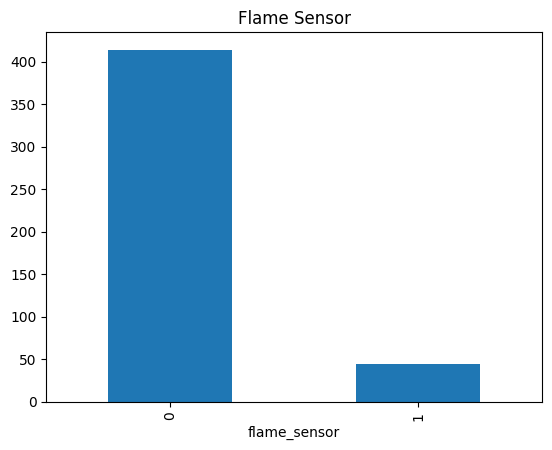

In [163]:
# show flame_sensor features
df["flame_sensor"].value_counts().plot(kind='bar')
plt.title("Flame Sensor")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instea

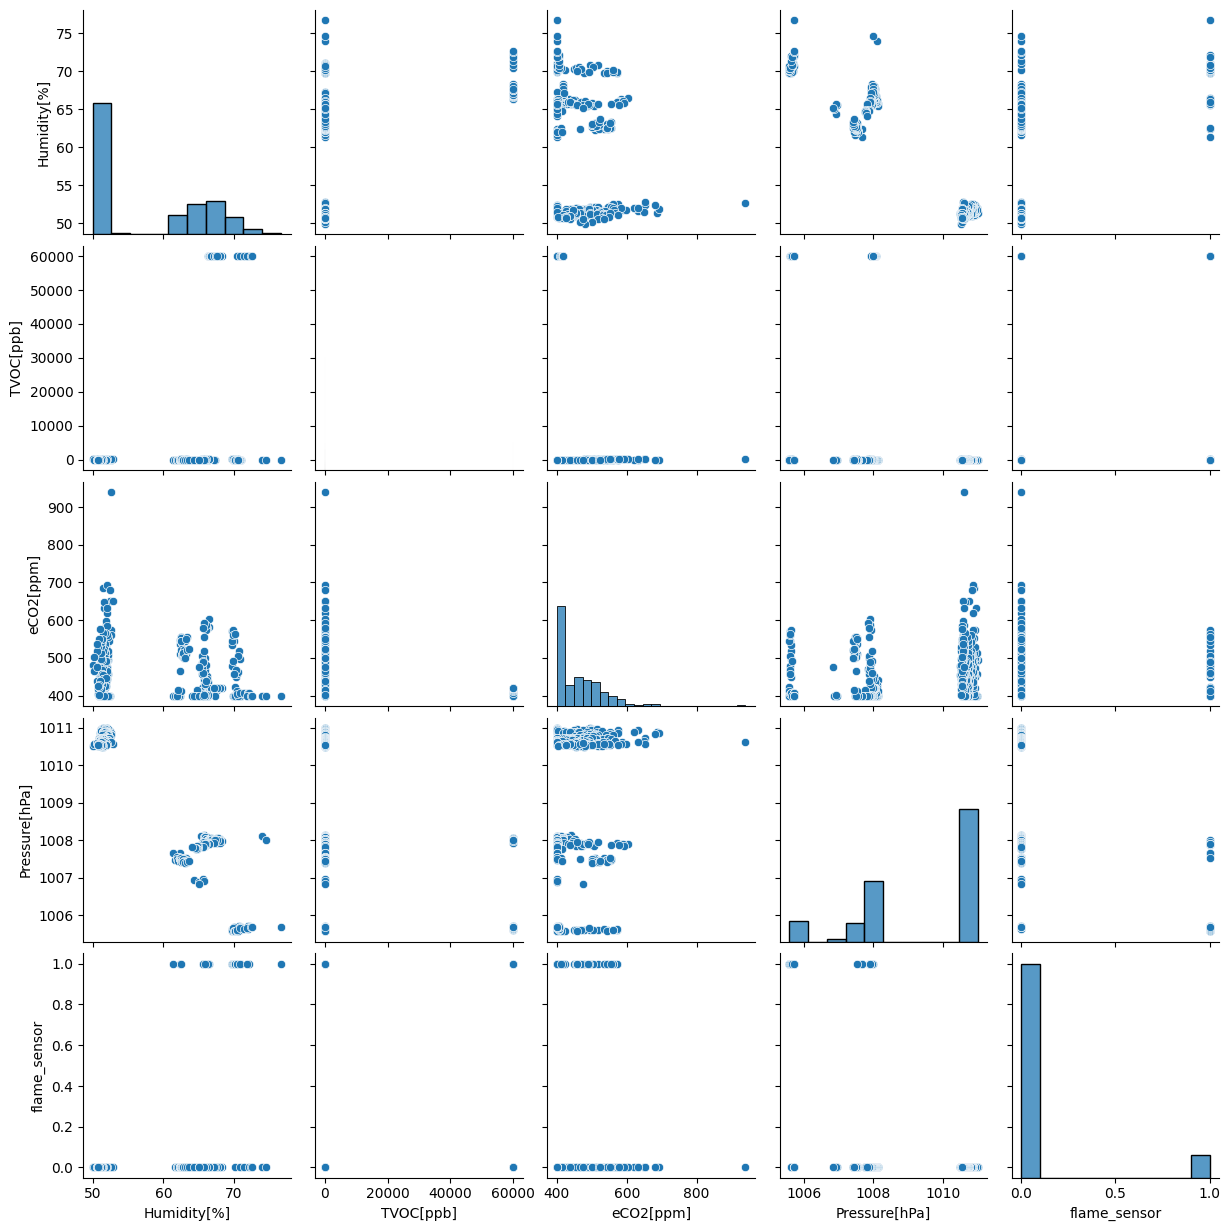

In [164]:
# show scatter plot of each column
sns.pairplot(df)
plt.show()

# Pre-processing

<AxesSubplot: xlabel='TVOC[ppb]'>

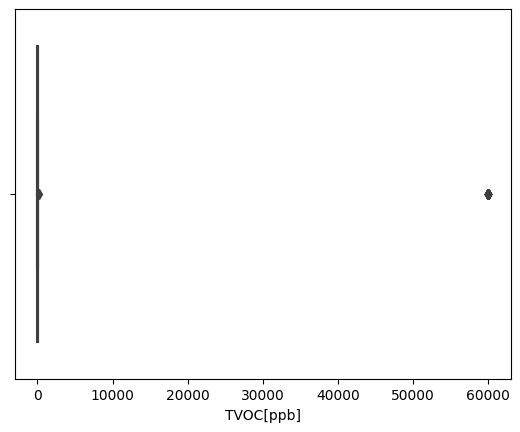

In [165]:
# find some outliers
sns.boxplot(x=df['TVOC[ppb]'])

In [166]:
# we can see that there are some outliers in the TVOC[ppb] column, we can remove them

# find the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Humidity[%]      14.6263
TVOC[ppb]        59.0000
eCO2[ppm]        95.7500
Pressure[hPa]     2.8100
flame_sensor      0.0000
dtype: float64


In [167]:
df.shape

(458, 5)

In [168]:
# plot boxplot that have line is the lower fence and upper fence
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

lower_fence, upper_fence



(Humidity[%]        29.385525
 TVOC[ppb]         -88.500000
 eCO2[ppm]         260.625000
 Pressure[hPa]    1003.685000
 flame_sensor        0.000000
 dtype: float64,
 Humidity[%]        87.890725
 TVOC[ppb]         147.500000
 eCO2[ppm]         643.625000
 Pressure[hPa]    1014.925000
 flame_sensor        0.000000
 dtype: float64)

In [169]:
df.shape

(458, 5)

In [170]:
df["TVOC[ppb]"].value_counts()

TVOC[ppb]
0        145
60000     55
5         10
4          9
17         9
        ... 
87         1
83         1
97         1
85         1
43         1
Name: count, Length: 91, dtype: int64

In [171]:
# see te uniuqe values of the TVOC[ppb] column and count the number of each value

df[df["TVOC[ppb]"] > 1000]


,Humidity[%],TVOC[ppb],eCO2[ppm],Pressure[hPa],flame_sensor
288,70.4446,60000,405,1005.61,1
289,70.8575,60000,407,1005.66,1
290,71.3785,60000,407,1005.64,0
291,71.9837,60000,407,1005.63,1
292,72.1741,60000,407,1005.71,0
293,71.9713,60000,407,1005.72,1
294,72.1172,60000,407,1005.70,1
295,71.9044,60000,400,1005.67,1
296,72.4760,60000,400,1005.70,0
297,72.5963,60000,400,1005.70,0


In [172]:
df_replace_outlier = df

In [173]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_replace_outlier)
df_scaled = pd.DataFrame(df_scaled, columns=df_replace_outlier.columns)
df_scaled

,Humidity[%],TVOC[ppb],eCO2[ppm],Pressure[hPa],flame_sensor
0,-0.853681,-0.370666,-0.950754,0.978681,-0.326006
1,-0.788776,-0.370666,-0.950754,0.984338,-0.326006
2,-0.787851,-0.370666,-0.950754,0.961708,-0.326006
3,-0.838119,-0.370666,-0.950754,0.973023,-0.326006
4,-0.848348,-0.369846,-0.950754,0.967366,-0.326006
...,...,...,...,...,...
453,0.805372,-0.370666,-0.950754,-1.312653,-0.326006
454,0.884951,-0.370666,-0.950754,-1.340941,-0.326006
455,0.959429,-0.370666,-0.950754,-1.295680,-0.326006
456,0.982649,-0.370666,-0.935242,-1.323968,-0.326006


In [174]:
# let replace them with cluster mean

# We'll use k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the k-means model on the 'TVOC[ppb]' column (reshaping the column to fit k-means requirements)
tvoc_values = df_scaled['TVOC[ppb]'].values.reshape(-1, 1)
kmeans.fit(tvoc_values)

# Assign the clusters to the data
df_scaled['Cluster'] = kmeans.labels_

# Check the centroids to understand the clusters
centroids = kmeans.cluster_centers_
centroids

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([[-0.37031891],
       [ 2.70689069],
       [-0.36741945]])

<AxesSubplot: xlabel='TVOC[ppb]', ylabel='Cluster'>

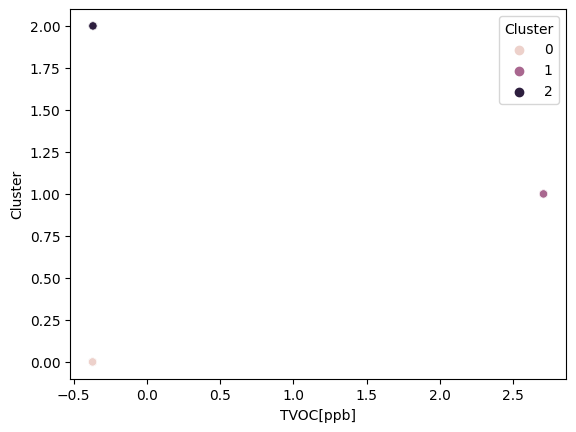

In [175]:
# let see the cluster with scatter plot
sns.scatterplot(data=df_scaled, x='TVOC[ppb]', y='Cluster', hue='Cluster')

In [177]:
mean_clusters_0_2 = df_scaled[df_scaled['Cluster'].isin([0, 2])]['TVOC[ppb]'].mean()

# Replace the TVOC[ppb] values in Cluster 1 with this mean
df_scaled.loc[df_scaled['Cluster'] == 1, 'TVOC[ppb]'] = mean_clusters_0_2

# Display the updated df_scaled to confirm the changes
df_scaled.head(), mean_clusters_0_2


(   Humidity[%]  TVOC[ppb]  eCO2[ppm]  Pressure[hPa]  flame_sensor  Cluster
 0    -0.853681  -0.370666  -0.950754       0.978681     -0.326006        0
 1    -0.788776  -0.370666  -0.950754       0.984338     -0.326006        0
 2    -0.787851  -0.370666  -0.950754       0.961708     -0.326006        0
 3    -0.838119  -0.370666  -0.950754       0.973023     -0.326006        0
 4    -0.848348  -0.369846  -0.950754       0.967366     -0.326006        0,
 -0.3694267686589463)

In [178]:
df_scaled

,Humidity[%],TVOC[ppb],eCO2[ppm],Pressure[hPa],flame_sensor,Cluster
0,-0.853681,-0.370666,-0.950754,0.978681,-0.326006,0
1,-0.788776,-0.370666,-0.950754,0.984338,-0.326006,0
2,-0.787851,-0.370666,-0.950754,0.961708,-0.326006,0
3,-0.838119,-0.370666,-0.950754,0.973023,-0.326006,0
4,-0.848348,-0.369846,-0.950754,0.967366,-0.326006,0
...,...,...,...,...,...,...
453,0.805372,-0.370666,-0.950754,-1.312653,-0.326006,0
454,0.884951,-0.370666,-0.950754,-1.340941,-0.326006,0
455,0.959429,-0.370666,-0.950754,-1.295680,-0.326006,0
456,0.982649,-0.370666,-0.935242,-1.323968,-0.326006,0


In [179]:
# drop the cluster column
df_scaled = df_scaled.drop('Cluster', axis=1)
df_scaled

,Humidity[%],TVOC[ppb],eCO2[ppm],Pressure[hPa],flame_sensor
0,-0.853681,-0.370666,-0.950754,0.978681,-0.326006
1,-0.788776,-0.370666,-0.950754,0.984338,-0.326006
2,-0.787851,-0.370666,-0.950754,0.961708,-0.326006
3,-0.838119,-0.370666,-0.950754,0.973023,-0.326006
4,-0.848348,-0.369846,-0.950754,0.967366,-0.326006
...,...,...,...,...,...
453,0.805372,-0.370666,-0.950754,-1.312653,-0.326006
454,0.884951,-0.370666,-0.950754,-1.340941,-0.326006
455,0.959429,-0.370666,-0.950754,-1.295680,-0.326006
456,0.982649,-0.370666,-0.935242,-1.323968,-0.326006


In [180]:
# inverse the scaling
df_replace_outlier = scaler.inverse_transform(df_scaled)
df_replace_outlier = pd.DataFrame(df_replace_outlier, columns=df.columns)
df_replace_outlier

,Humidity[%],TVOC[ppb],eCO2[ppm],Pressure[hPa],flame_sensor
0,51.4551,-9.094947e-13,400.0,1010.98,0.0
1,51.9602,-9.094947e-13,400.0,1010.99,0.0
2,51.9674,-9.094947e-13,400.0,1010.95,0.0
3,51.5762,-9.094947e-13,400.0,1010.97,0.0
4,51.4966,1.600000e+01,400.0,1010.96,0.0
...,...,...,...,...,...
453,64.3661,-9.094947e-13,400.0,1006.93,0.0
454,64.9854,-9.094947e-13,400.0,1006.88,0.0
455,65.5650,-9.094947e-13,400.0,1006.96,0.0
456,65.7457,-9.094947e-13,401.0,1006.91,0.0


In [181]:
df_replace_outlier["TVOC[ppb]"].value_counts()

TVOC[ppb]
-9.094947e-13    145
 2.416377e+01     55
 5.000000e+00     10
 4.000000e+00      9
 1.700000e+01      9
                ... 
 8.700000e+01      1
 8.300000e+01      1
 9.700000e+01      1
 8.500000e+01      1
 4.300000e+01      1
Name: count, Length: 91, dtype: int64

In [182]:
# make column "TVOC[ppb]" to be integer
df_replace_outlier["TVOC[ppb]"] = df_replace_outlier["TVOC[ppb]"].astype(int)
df_replace_outlier["TVOC[ppb]"].value_counts()

TVOC[ppb]
0      145
24      57
18      13
5       10
4        9
      ... 
154      1
116      1
123      1
20       1
43       1
Name: count, Length: 86, dtype: int64

In [183]:
df.shape

(458, 5)

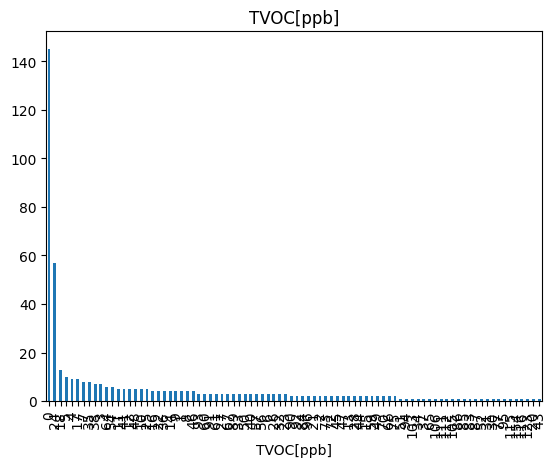

In [184]:
# check the distribution of the TVOC[ppb] column
df_replace_outlier["TVOC[ppb]"].value_counts().plot(kind='bar')
plt.title("TVOC[ppb]")
plt.show()

In [185]:
# save the data to csv
df_replace_outlier.to_csv('FlareWatcher_cleaned.csv', index=False)

In [304]:
df_replace_outlier.describe()

,Humidity[%],TVOC[ppb],eCO2[ppm],Pressure[hPa],flame_sensor
count,458.000000,458.000000,458.000000,458.000000,458.000000
mean,58.098573,24.115721,461.290393,1009.250153,0.096070
std,7.790662,28.406200,64.535512,1.769462,0.295009
min,49.932100,0.000000,400.000000,1005.570000,0.000000
25%,51.324975,0.000000,404.250000,1007.900000,0.000000
50%,51.963800,17.000000,447.000000,1010.550000,0.000000
75%,65.951275,36.000000,500.000000,1010.710000,0.000000
max,76.729600,154.000000,940.000000,1011.000000,1.000000


In [187]:
df2 = pd.read_csv("smoke_detection_iot.csv")
df2

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [188]:
# do under sampling with C-NN
# Separate features and target
X = df2.drop('Fire Alarm', axis=1)  # Adjust the column name if necessary
y = df2['Fire Alarm']

# Initialize the Condensed Nearest Neighbor
cnn = CondensedNearestNeighbour(n_neighbors=3, random_state=42)

# Fit and resample with CNN
X_resampled, y_resampled = cnn.fit_resample(X, y)

# Check the size and adjust if necessary
desired_size = 458
current_size = X_resampled.shape[0]
if current_size > desired_size:
    # Random undersampling to reduce to desired size
    resampled_df2 = pd.DataFrame(X_resampled, columns=X.columns)
    resampled_df2['Fire Alarm'] = y_resampled
    resampled_df2 = resampled_df2.sample(n=desired_size, random_state=42)
elif current_size < desired_size:
    # Error message or handling code
    print("Resampling resulted in fewer samples than desired. Consider using different parameters or methods.")

# Save the resampled df2set
resampled_df2.to_csv('resampled_df2set_458.csv', index=False)

print("Resampling completed and df2 adjusted to desired size.")

Resampling completed and df2 adjusted to desired size.


In [189]:
df_resampled = pd.read_csv('resampled_df2set_458.csv')
df_resampled

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,57249,1655124671,25.555,44.79,61,410,12825,20719,937.567,2.44,2.53,16.78,2.617,0.059,363,0
1,62025,1655129447,-17.546,19.17,60000,30178,10805,15522,936.771,12110.48,28538.89,43260.21,32081.258,15782.438,5139,0
2,59810,1655127232,20.643,42.37,166,413,12782,20554,937.398,1.97,2.05,13.58,2.118,0.048,2924,0
3,52071,1654713116,28.590,42.61,56,400,12795,20692,937.545,1.92,2.00,13.23,2.064,0.047,929,0
4,51816,1654712861,26.390,46.50,70,456,12785,20685,937.488,2.31,2.40,15.88,2.477,0.056,674,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,55947,1654716992,41.170,29.10,664,400,13493,20537,936.853,0.73,0.76,5.05,0.787,0.018,4805,0
454,54651,1654715696,27.810,41.22,0,400,13143,20977,937.462,1.97,2.05,13.58,2.117,0.048,3509,0
455,57931,1655125353,-5.626,45.25,43,400,12804,20699,937.478,1.92,1.99,13.20,2.059,0.047,1045,0
456,61413,1655128835,18.890,20.03,33700,753,12630,18727,936.876,0.44,0.46,3.02,0.471,0.011,4527,0


In [190]:
df_resampled["Fire Alarm"].value_counts()

Fire Alarm
0    455
1      3
Name: count, dtype: int64

In [191]:
X = resampled_df2.drop('Fire Alarm', axis=1)
y = resampled_df2['Fire Alarm']

k_neighbors = max(min(y.value_counts()) - 1, 1)  # Ensuring it's at least 1
smote = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=k_neighbors)
X_smote, y_smote = smote.fit_resample(X, y)


# Convert back to DataFrame
df2_smote = pd.DataFrame(X_smote, columns=X.columns)
df2_smote['Fire Alarm'] = y_smote

# Now you can check the balance
print(df2_smote['Fire Alarm'].value_counts())

Fire Alarm
0    455
1    455
Name: count, dtype: int64


In [192]:
# from imblearn.under_sampling import CondensedNearestNeighbour

# # Modify the sampling_strategy parameter
# cnn = CondensedNearestNeighbour(n_neighbors=1, random_state=42, sampling_strategy='auto')  # or a specific ratio

# # Fit and resample with CNN
# X_resampled, y_resampled = cnn.fit_resample(X, y)


In [193]:
df_resampled2 = pd.read_csv('resampled_df2set_458_2.csv')
df_resampled2['Fire Alarm'].value_counts()

Fire Alarm
0    455
1      3
Name: count, dtype: int64

In [194]:
# smt = SMOTETomek(random_state=42)
# X_smt, y_smt = smt.fit_resample(X, y)

# # Convert to DataFrame
# balanced_df2 = pd.DataFrame(X_smt, columns=X.columns)
# balanced_df2['Fire Alarm'] = y_smt

# # Check the new distribution
# print(balanced_df2['Fire Alarm'].value_counts())

In [195]:
# drop some columns that are not useful (Temperature[C] I do not use in my project)
to_drop = ["Unnamed: 0", "UTC", "Temperature[C]",]
df2_smote = df2_smote.drop(to_drop, axis=1)
df2_smote

,Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,44.790000,61,410,12825,20719,937.567000,2.440000,2.530000,16.780000,2.617000,0.059000,363,0
1,19.170000,60000,30178,10805,15522,936.771000,12110.480000,28538.890000,43260.210000,32081.258000,15782.438000,5139,0
2,42.370000,166,413,12782,20554,937.398000,1.970000,2.050000,13.580000,2.118000,0.048000,2924,0
3,42.610000,56,400,12795,20692,937.545000,1.920000,2.000000,13.230000,2.064000,0.047000,929,0
4,46.500000,70,456,12785,20685,937.488000,2.310000,2.400000,15.880000,2.477000,0.056000,674,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,58.464065,23,400,13360,20179,939.587958,1.853403,1.925831,12.775326,1.992044,0.045214,3190,1
906,57.722037,5,400,13365,20180,939.574505,1.789908,1.859908,12.329268,1.922890,0.043495,3178,1
907,57.769564,141,400,13233,20061,939.659268,2.126243,2.211072,14.641797,2.283487,0.051415,3249,1
908,57.124646,87,400,13275,20097,939.623661,1.976351,2.054888,13.603112,2.121863,0.047695,3218,1


In [196]:
# save to data to csv
# df_resampled.to_csv('smoke_detection_iot_cleaned.csv', index=False)

In [197]:
df2_smote['Fire Alarm'].value_counts()

Fire Alarm
0    455
1    455
Name: count, dtype: int64

# Data Intregation

In [198]:
# Fellegi-Sunter (or Fellegi-Sunter) record linkage method
def calculate_match_score(row1, row2):
    score = 0
    # Humidity[%] Match if the difference is within ±30%
    if abs(row1['Humidity[%]'] - row2['Humidity[%]']) <= 30:
        score += 1
    # TVOC[ppb] Match if the difference is within ±200 ppb
    if abs(row1['TVOC[ppb]'] - row2['TVOC[ppb]']) <= 200:
        score += 1
    # eCO2[ppm] Match if the difference is within ±50
    if abs(row1['eCO2[ppm]'] == row2['eCO2[ppm]']) <= 50:
        score += 1
    # Pressure[hPa] Match if the difference is within ±50
    if abs(row1['Pressure[hPa]'] == row2['Pressure[hPa]'] <= 50):
        score += 1
    return score

In [199]:
df2_smote.to_csv("resampled_df2set_458_3.csv")

In [200]:
df1 = pd.read_csv("FlareWatcher_cleaned.csv")
# df2 = pd.read_csv("smoke_detection_iot_cleaned.csv")
df2 = pd.read_csv("resampled_df2set_458_3.csv")

In [201]:
index_pairs = list(product(df1.index, df2.index))

# Calculate scores for each pair
scores = [calculate_match_score(df1.loc[pair[0]], df2.loc[pair[1]]) for pair in index_pairs]

# Convert the scores into a DataFrame
scores_df = pd.DataFrame(index_pairs, columns=['FlareWatcher_Index', 'SmokeDetection_Index'])
scores_df['Score'] = scores

# Define thresholds for match categorization (assuming max score is 4)
threshold_match = 4       # Perfect matches
threshold_possible = 3    # Possible matches

# Categorize matches based on the score
scores_df['Match_Type'] = np.where(scores_df['Score'] == threshold_match, 'Match',
                                   np.where(scores_df['Score'] >= threshold_possible, 'Possible Match', 'Non-Match'))

scores_df.sort_values(by='Score', ascending=False, inplace=True)

# Display the top scoring pairs
scores_df.head(10)

,FlareWatcher_Index,SmokeDetection_Index,Score,Match_Type
0,0,0,3,Possible Match
271661,298,481,3,Possible Match
271731,298,551,3,Possible Match
271730,298,550,3,Possible Match
271729,298,549,3,Possible Match
271728,298,548,3,Possible Match
271727,298,547,3,Possible Match
271726,298,546,3,Possible Match
271725,298,545,3,Possible Match
271724,298,544,3,Possible Match


In [202]:
scores_df['Score'].value_counts()

Score
3    375635
1     22953
2     18192
Name: count, dtype: int64

In [203]:
df1

,Humidity[%],TVOC[ppb],eCO2[ppm],Pressure[hPa],flame_sensor
0,51.4551,0,400.0,1010.98,0.0
1,51.9602,0,400.0,1010.99,0.0
2,51.9674,0,400.0,1010.95,0.0
3,51.5762,0,400.0,1010.97,0.0
4,51.4966,16,400.0,1010.96,0.0
...,...,...,...,...,...
453,64.3661,0,400.0,1006.93,0.0
454,64.9854,0,400.0,1006.88,0.0
455,65.5650,0,400.0,1006.96,0.0
456,65.7457,0,401.0,1006.91,0.0


In [204]:
df2

,Unnamed: 0,Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,44.790000,61,410,12825,20719,937.567000,2.440000,2.530000,16.780000,2.617000,0.059000,363,0
1,1,19.170000,60000,30178,10805,15522,936.771000,12110.480000,28538.890000,43260.210000,32081.258000,15782.438000,5139,0
2,2,42.370000,166,413,12782,20554,937.398000,1.970000,2.050000,13.580000,2.118000,0.048000,2924,0
3,3,42.610000,56,400,12795,20692,937.545000,1.920000,2.000000,13.230000,2.064000,0.047000,929,0
4,4,46.500000,70,456,12785,20685,937.488000,2.310000,2.400000,15.880000,2.477000,0.056000,674,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,905,58.464065,23,400,13360,20179,939.587958,1.853403,1.925831,12.775326,1.992044,0.045214,3190,1
906,906,57.722037,5,400,13365,20180,939.574505,1.789908,1.859908,12.329268,1.922890,0.043495,3178,1
907,907,57.769564,141,400,13233,20061,939.659268,2.126243,2.211072,14.641797,2.283487,0.051415,3249,1
908,908,57.124646,87,400,13275,20097,939.623661,1.976351,2.054888,13.603112,2.121863,0.047695,3218,1


In [205]:
df1_sample = df1
df2_sample = df2

# Generate pairs and calculate scores
index_pairs = list(product(df1_sample.index, df2_sample.index))
scores = []
for pair in index_pairs:
    score = calculate_match_score(df1_sample.loc[pair[0]], df2_sample.loc[pair[1]])
    scores.append((pair[0], pair[1], score))

# Convert to DataFrame
scores_df = pd.DataFrame(scores, columns=['FlareWatcher_Index', 'SmokeDetection_Index', 'Score'])
scores_df.sort_values(by='Score', ascending=False, inplace=True)

print(scores_df.head(10))

        FlareWatcher_Index  SmokeDetection_Index  Score
0                        0                     0      3
271661                 298                   481      3
271731                 298                   551      3
271730                 298                   550      3
271729                 298                   549      3
271728                 298                   548      3
271727                 298                   547      3
271726                 298                   546      3
271725                 298                   545      3
271724                 298                   544      3


In [206]:
# Filter to get only the pairs classified Score >= 2
confirmed_matches = scores_df[scores_df['Score'] >= 2]
confirmed_matches

,FlareWatcher_Index,SmokeDetection_Index,Score
0,0,0,3
271661,298,481,3
271731,298,551,3
271730,298,550,3
271729,298,549,3
...,...,...,...
316815,348,135,2
125857,138,277,2
29446,32,326,2
173210,190,310,2


In [207]:
# Initialize a list to store merged records
merged_records = []

# Define tolerance levels for each parameter
humidity_tolerance = 5  # percent
tvoc_tolerance = 100    # ppb
eco2_tolerance = 10     # ppm
pressure_tolerance = 5  # hPa

# Function to merge two rows based on specified tolerances
def average_values(row1, row2):
    record = row2.to_dict()  # Start with row2's values to retain all SmokeDetection data

    # Humidity[%]: Merge if within tolerance, else keep original from row2
    if abs(row1['Humidity[%]'] - row2['Humidity[%]']) <= humidity_tolerance:
        record['Humidity[%]'] = (row1['Humidity[%]'] + row2['Humidity[%]']) / 2

    # TVOC[ppb]: Merge if within tolerance, else keep original from row2
    if abs(row1['TVOC[ppb]'] - row2['TVOC[ppb]']) <= tvoc_tolerance:
        record['TVOC[ppb]'] = (row1['TVOC[ppb]'] + row2['TVOC[ppb]']) / 2

    # eCO2[ppm]: Merge if within tolerance, else keep original from row2
    if abs(row1['eCO2[ppm]'] - row2['eCO2[ppm]']) <= eco2_tolerance:
        record['eCO2[ppm]'] = (row1['eCO2[ppm]'] + row2['eCO2[ppm]']) / 2

    # Pressure[hPa]: Merge if within tolerance, else keep original from row2
    if abs(row1['Pressure[hPa]'] - row2['Pressure[hPa]']) <= pressure_tolerance:
        record['Pressure[hPa]'] = (row1['Pressure[hPa]'] + row2['Pressure[hPa]']) / 2

    return record

# Iterate through each match to merge records based on defined conditions
for _, match in confirmed_matches.iterrows():
    row1 = df1.loc[match['FlareWatcher_Index']]
    row2 = df2.loc[match['SmokeDetection_Index']]
    merged_record = average_values(row1, row2)
    merged_records.append(merged_record)

# Convert the list of merged records into a DataFrame
merged_df = pd.DataFrame(merged_records)

# Merge this DataFrame back with df2 to ensure all SmokeDetection records are included
final_df = pd.merge(df2, merged_df, how='left', on=df2.columns.tolist(), suffixes=('', '_merged'))

# Display the first few rows of the final merged DataFrame to verify
print(final_df.head())


   Unnamed: 0  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  \
0           0        44.79         61        410   12825        20719   
1           0        44.79         61        410   12825        20719   
2           0        44.79         61        410   12825        20719   
3           1        19.17      60000      30178   10805        15522   
4           2        42.37        166        413   12782        20554   

   Pressure[hPa]     PM1.0     PM2.5     NC0.5      NC1.0      NC2.5   CNT  \
0        937.567      2.44      2.53     16.78      2.617      0.059   363   
1        937.567      2.44      2.53     16.78      2.617      0.059   363   
2        937.567      2.44      2.53     16.78      2.617      0.059   363   
3        936.771  12110.48  28538.89  43260.21  32081.258  15782.438  5139   
4        937.398      1.97      2.05     13.58      2.118      0.048  2924   

   Fire Alarm  
0           0  
1           0  
2           0  
3           0  
4           

/var/folders/zc/6vdm7g3s70q83l9rmg6pcc8m0000gn/T/ipykernel_464/85598080.py:45: UserWarning:

You are merging on int and float columns where the float values are not equal to their int representation.



In [208]:
final_df = pd.DataFrame(final_df)
final_df

,Unnamed: 0,Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,44.790000,61,410,12825,20719,937.567000,2.440000,2.530000,16.780000,2.61700,0.059000,363,0
1,0,44.790000,61,410,12825,20719,937.567000,2.440000,2.530000,16.780000,2.61700,0.059000,363,0
2,0,44.790000,61,410,12825,20719,937.567000,2.440000,2.530000,16.780000,2.61700,0.059000,363,0
3,1,19.170000,60000,30178,10805,15522,936.771000,12110.480000,28538.890000,43260.210000,32081.25800,15782.438000,5139,0
4,2,42.370000,166,413,12782,20554,937.398000,1.970000,2.050000,13.580000,2.11800,0.048000,2924,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96082,909,57.478569,190,400,13180,20013,939.688737,2.238939,2.328892,15.412686,2.40386,0.053975,3273,1
96083,909,57.478569,190,400,13180,20013,939.688737,2.238939,2.328892,15.412686,2.40386,0.053975,3273,1
96084,909,57.478569,190,400,13180,20013,939.688737,2.238939,2.328892,15.412686,2.40386,0.053975,3273,1
96085,909,57.478569,190,400,13180,20013,939.688737,2.238939,2.328892,15.412686,2.40386,0.053975,3273,1


# Got final dataset

In [209]:
# save the data to csv
final_df.to_csv('final_df.csv', index=False)

In [210]:
final_df[final_df['TVOC[ppb]'] > 30000]

,Unnamed: 0,Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
3,1,19.17,60000,30178,10805,15522,936.771,12110.48,28538.89,43260.21,32081.258,15782.438,5139,0
2310,21,18.29,54128,975,12510,18413,936.914,0.89,0.93,6.13,0.956,0.022,4597,0
4748,50,19.24,42724,810,12602,18589,936.883,0.97,1.00,6.64,1.036,0.023,4587,0
9108,128,27.14,60000,6675,11534,16812,936.833,2339.51,2430.67,16101.92,2510.903,56.713,4938,0
9109,128,27.14,60000,6675,11534,16812,936.833,2339.51,2430.67,16101.92,2510.903,56.713,4938,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40711,432,21.70,30424,734,12638,18780,936.900,0.72,0.75,4.94,0.770,0.017,4488,0
40712,432,21.70,30424,734,12638,18780,936.900,0.72,0.75,4.94,0.770,0.017,4488,0
40713,432,21.70,30424,734,12638,18780,936.900,0.72,0.75,4.94,0.770,0.017,4488,0
40714,432,21.70,30424,734,12638,18780,936.900,0.72,0.75,4.94,0.770,0.017,4488,0


In [211]:
# drop TVOC[ppb] column that have value 60000
final_df = final_df[final_df['TVOC[ppb]'] < 30000]
final_df


,Unnamed: 0,Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,44.790000,61,410,12825,20719,937.567000,2.440000,2.530000,16.780000,2.61700,0.059000,363,0
1,0,44.790000,61,410,12825,20719,937.567000,2.440000,2.530000,16.780000,2.61700,0.059000,363,0
2,0,44.790000,61,410,12825,20719,937.567000,2.440000,2.530000,16.780000,2.61700,0.059000,363,0
4,2,42.370000,166,413,12782,20554,937.398000,1.970000,2.050000,13.580000,2.11800,0.048000,2924,0
5,2,42.370000,166,413,12782,20554,937.398000,1.970000,2.050000,13.580000,2.11800,0.048000,2924,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96082,909,57.478569,190,400,13180,20013,939.688737,2.238939,2.328892,15.412686,2.40386,0.053975,3273,1
96083,909,57.478569,190,400,13180,20013,939.688737,2.238939,2.328892,15.412686,2.40386,0.053975,3273,1
96084,909,57.478569,190,400,13180,20013,939.688737,2.238939,2.328892,15.412686,2.40386,0.053975,3273,1
96085,909,57.478569,190,400,13180,20013,939.688737,2.238939,2.328892,15.412686,2.40386,0.053975,3273,1


In [212]:
final_df.to_csv('final_df.csv', index=False)

In [213]:
df = final_df

In [214]:
df

,Unnamed: 0,Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,44.790000,61,410,12825,20719,937.567000,2.440000,2.530000,16.780000,2.61700,0.059000,363,0
1,0,44.790000,61,410,12825,20719,937.567000,2.440000,2.530000,16.780000,2.61700,0.059000,363,0
2,0,44.790000,61,410,12825,20719,937.567000,2.440000,2.530000,16.780000,2.61700,0.059000,363,0
4,2,42.370000,166,413,12782,20554,937.398000,1.970000,2.050000,13.580000,2.11800,0.048000,2924,0
5,2,42.370000,166,413,12782,20554,937.398000,1.970000,2.050000,13.580000,2.11800,0.048000,2924,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96082,909,57.478569,190,400,13180,20013,939.688737,2.238939,2.328892,15.412686,2.40386,0.053975,3273,1
96083,909,57.478569,190,400,13180,20013,939.688737,2.238939,2.328892,15.412686,2.40386,0.053975,3273,1
96084,909,57.478569,190,400,13180,20013,939.688737,2.238939,2.328892,15.412686,2.40386,0.053975,3273,1
96085,909,57.478569,190,400,13180,20013,939.688737,2.238939,2.328892,15.412686,2.40386,0.053975,3273,1


In [215]:
# Group row that have same Unnamed: 0 
grouped_df = df.groupby('Unnamed: 0').mean()

In [305]:
grouped_df

,Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,44.790000,61.0,410.0,12825.0,20719.0,937.567000,2.440000,2.530000,16.780000,2.617000,0.059000,363.0,0.0
1,42.370000,166.0,413.0,12782.0,20554.0,937.398000,1.970000,2.050000,13.580000,2.118000,0.048000,2924.0,0.0
2,42.610000,56.0,400.0,12795.0,20692.0,937.545000,1.920000,2.000000,13.230000,2.064000,0.047000,929.0,0.0
3,46.500000,70.0,456.0,12785.0,20685.0,937.488000,2.310000,2.400000,15.880000,2.477000,0.056000,674.0,0.0
4,55.610000,11.0,410.0,12562.0,19649.0,939.799000,0.000000,0.000000,0.000000,0.000000,0.000000,163.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,58.464065,23.0,400.0,13360.0,20179.0,939.587958,1.853403,1.925831,12.775326,1.992044,0.045214,3190.0,1.0
882,57.722037,5.0,400.0,13365.0,20180.0,939.574505,1.789908,1.859908,12.329268,1.922890,0.043495,3178.0,1.0
883,57.769564,141.0,400.0,13233.0,20061.0,939.659268,2.126243,2.211072,14.641797,2.283487,0.051415,3249.0,1.0
884,57.124646,87.0,400.0,13275.0,20097.0,939.623661,1.976351,2.054888,13.603112,2.121863,0.047695,3218.0,1.0


In [216]:
grouped_df['Fire Alarm'].count

<bound method Series.count of Unnamed: 0
0      0.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
905    1.0
906    1.0
907    1.0
908    1.0
909    1.0
Name: Fire Alarm, Length: 886, dtype: float64>

In [217]:
grouped_df['Fire Alarm'].value_counts() 

Fire Alarm
1.0    455
0.0    431
Name: count, dtype: int64

In [218]:
# reset index
grouped_df = grouped_df.reset_index()
grouped_df

,Unnamed: 0,Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,44.790000,61.0,410.0,12825.0,20719.0,937.567000,2.440000,2.530000,16.780000,2.617000,0.059000,363.0,0.0
1,2,42.370000,166.0,413.0,12782.0,20554.0,937.398000,1.970000,2.050000,13.580000,2.118000,0.048000,2924.0,0.0
2,3,42.610000,56.0,400.0,12795.0,20692.0,937.545000,1.920000,2.000000,13.230000,2.064000,0.047000,929.0,0.0
3,4,46.500000,70.0,456.0,12785.0,20685.0,937.488000,2.310000,2.400000,15.880000,2.477000,0.056000,674.0,0.0
4,5,55.610000,11.0,410.0,12562.0,19649.0,939.799000,0.000000,0.000000,0.000000,0.000000,0.000000,163.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,905,58.464065,23.0,400.0,13360.0,20179.0,939.587958,1.853403,1.925831,12.775326,1.992044,0.045214,3190.0,1.0
882,906,57.722037,5.0,400.0,13365.0,20180.0,939.574505,1.789908,1.859908,12.329268,1.922890,0.043495,3178.0,1.0
883,907,57.769564,141.0,400.0,13233.0,20061.0,939.659268,2.126243,2.211072,14.641797,2.283487,0.051415,3249.0,1.0
884,908,57.124646,87.0,400.0,13275.0,20097.0,939.623661,1.976351,2.054888,13.603112,2.121863,0.047695,3218.0,1.0


In [219]:
# drop some columns that are not useful
to_drop = ["Unnamed: 0"]
grouped_df = grouped_df.drop(to_drop, axis=1)
grouped_df


,Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,44.790000,61.0,410.0,12825.0,20719.0,937.567000,2.440000,2.530000,16.780000,2.617000,0.059000,363.0,0.0
1,42.370000,166.0,413.0,12782.0,20554.0,937.398000,1.970000,2.050000,13.580000,2.118000,0.048000,2924.0,0.0
2,42.610000,56.0,400.0,12795.0,20692.0,937.545000,1.920000,2.000000,13.230000,2.064000,0.047000,929.0,0.0
3,46.500000,70.0,456.0,12785.0,20685.0,937.488000,2.310000,2.400000,15.880000,2.477000,0.056000,674.0,0.0
4,55.610000,11.0,410.0,12562.0,19649.0,939.799000,0.000000,0.000000,0.000000,0.000000,0.000000,163.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,58.464065,23.0,400.0,13360.0,20179.0,939.587958,1.853403,1.925831,12.775326,1.992044,0.045214,3190.0,1.0
882,57.722037,5.0,400.0,13365.0,20180.0,939.574505,1.789908,1.859908,12.329268,1.922890,0.043495,3178.0,1.0
883,57.769564,141.0,400.0,13233.0,20061.0,939.659268,2.126243,2.211072,14.641797,2.283487,0.051415,3249.0,1.0
884,57.124646,87.0,400.0,13275.0,20097.0,939.623661,1.976351,2.054888,13.603112,2.121863,0.047695,3218.0,1.0


In [220]:
# save the data to csv
grouped_df.to_csv('final_to_train.csv', index=False)

# Explore final dataset

<AxesSubplot: xlabel='Fire Alarm'>

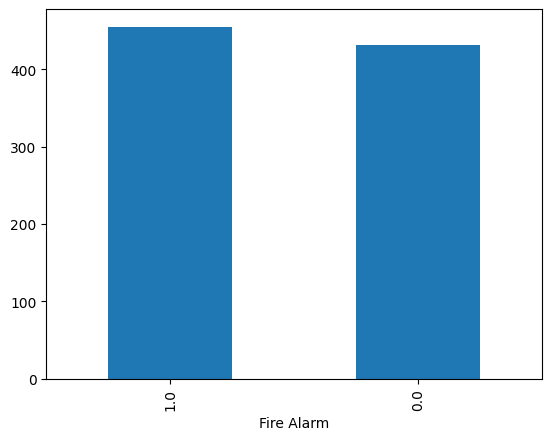

In [221]:
# check the distribution of the Fire Alarm column
grouped_df["Fire Alarm"].value_counts().plot(kind='bar')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instea

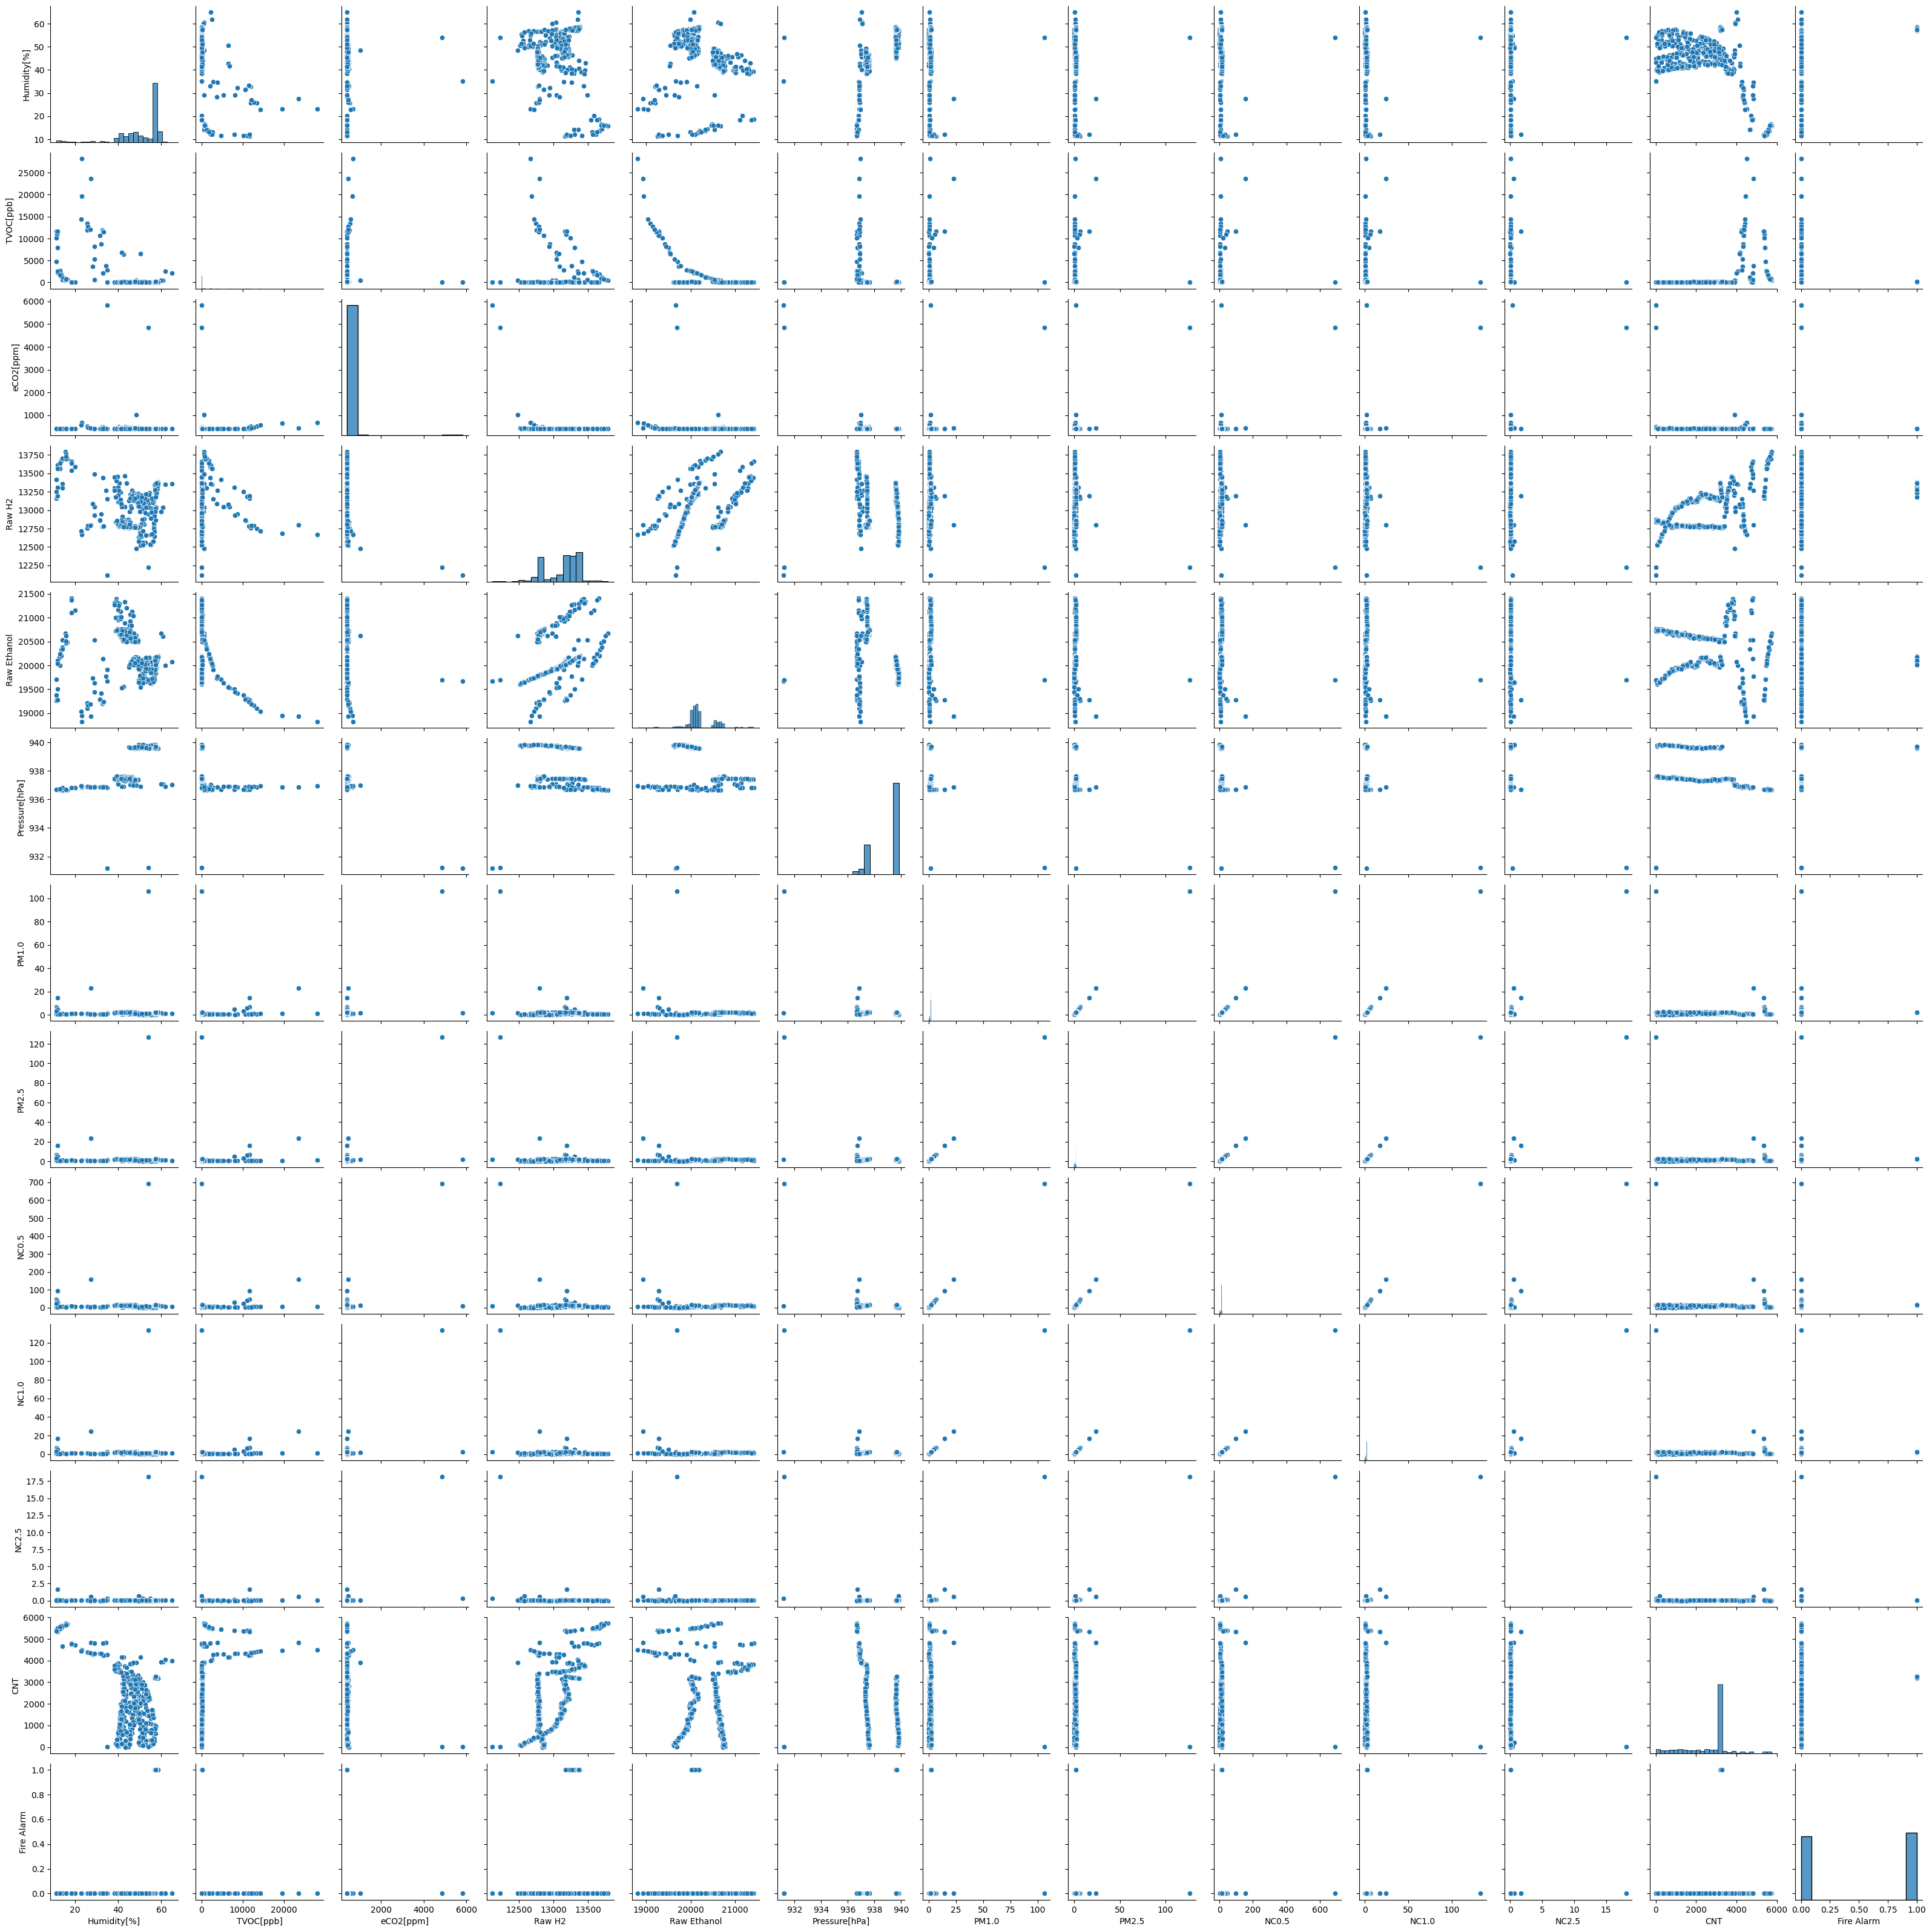

In [222]:
# show scatter plot of each column
sns.pairplot(grouped_df)

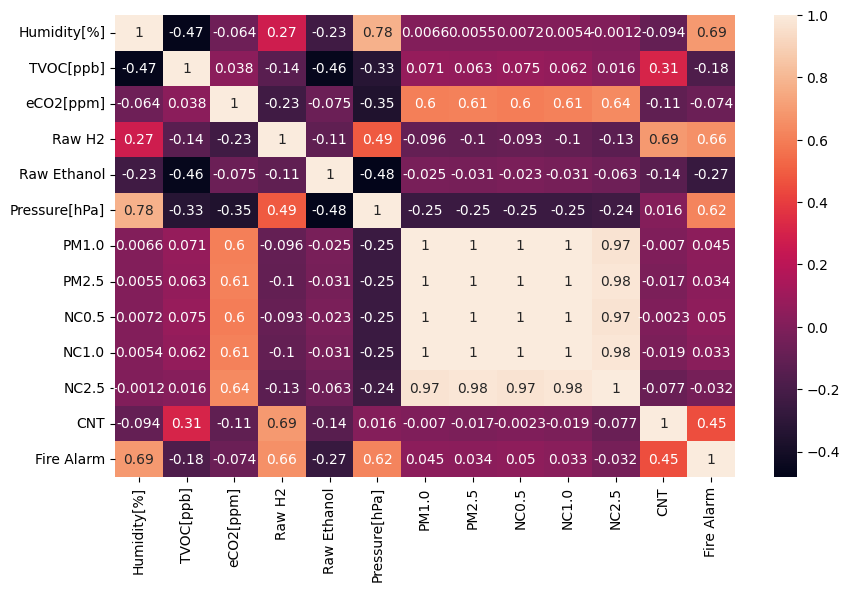

In [223]:
# show correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_df.corr(), annot=True)
plt.show()

In [224]:
# sees statistic of the data
grouped_df.describe()

,Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,51.153041,447.880361,417.007901,13139.107223,20208.598194,938.928969,1.795427,1.889402,12.302623,1.955693,0.066173,2715.004515,0.513544
std,9.680409,2131.822544,237.182785,246.900805,344.180118,1.137557,3.670117,4.335115,23.958821,4.563790,0.611308,1133.340925,0.500099
min,11.400000,0.000000,400.000000,12115.000000,18817.000000,931.171000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.567500,10.000000,400.000000,12865.500000,20050.000000,937.520750,1.407500,1.465000,9.687500,1.511000,0.039000,2140.750000,0.000000
50%,56.918234,70.000000,400.000000,13214.000000,20137.000000,939.590666,1.824540,1.898244,12.571613,1.961601,0.044612,3178.000000,1.000000
75%,57.663656,138.000000,400.000000,13329.750000,20333.500000,939.645937,2.038854,2.119029,14.019999,2.186395,0.049625,3237.000000,1.000000
max,64.930000,28199.000000,5835.000000,13795.000000,21410.000000,939.850000,106.280000,126.440000,691.230000,133.227000,18.128000,5722.000000,1.000000


In [225]:
# check null value
grouped_df.isnull().sum()

Humidity[%]      0
TVOC[ppb]        0
eCO2[ppm]        0
Raw H2           0
Raw Ethanol      0
Pressure[hPa]    0
PM1.0            0
PM2.5            0
NC0.5            0
NC1.0            0
NC2.5            0
CNT              0
Fire Alarm       0
dtype: int64

In [284]:
# scale the data
scaler = StandardScaler()
grouped_df_scaled = scaler.fit_transform(grouped_df)
grouped_df_scaled = pd.DataFrame(grouped_df_scaled, columns=grouped_df.columns)
grouped_df_scaled


,Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,-0.657682,-0.181581,-0.029563,-1.272919,1.483787,-1.197952,0.175727,0.147853,0.186984,0.144985,-0.011741,-2.076456,-1.027465
1,-0.907813,-0.132300,-0.016907,-1.447176,1.004116,-1.346600,0.047593,0.037067,0.053346,0.035584,-0.029745,0.184511,-1.027465
2,-0.883007,-0.183928,-0.071748,-1.394494,1.405296,-1.217302,0.033962,0.025527,0.038729,0.023745,-0.031382,-1.576766,-1.027465
3,-0.480937,-0.177357,0.164490,-1.435019,1.384946,-1.267438,0.140285,0.117848,0.149398,0.114291,-0.016651,-1.801891,-1.027465
4,0.460670,-0.205049,-0.029563,-2.338725,-1.626806,0.765256,-0.489478,-0.436083,-0.513780,-0.428766,-0.108310,-2.253025,-1.027465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,0.755666,-0.199416,-0.071748,0.895167,-0.086045,0.579628,0.015806,0.008408,0.019741,0.007970,-0.034306,0.419348,0.973269
882,0.678970,-0.207865,-0.071748,0.915430,-0.083138,0.567795,-0.001504,-0.006807,0.001113,-0.007192,-0.037118,0.408753,0.973269
883,0.683882,-0.144033,-0.071748,0.380500,-0.429082,0.642351,0.090189,0.074243,0.097688,0.071865,-0.024156,0.471435,0.973269
884,0.617224,-0.169378,-0.071748,0.550705,-0.324427,0.611032,0.049324,0.038195,0.054311,0.036431,-0.030244,0.444067,0.973269


In [285]:
# PCA for dimensionality reduction
# Separate features and target
X = grouped_df_scaled.drop('Fire Alarm', axis=1)
y = grouped_df_scaled['Fire Alarm']

# Initialize PCA
pca = PCA(n_components=11, random_state=42)

# Fit and transform the features
X_pca = pca.fit_transform(X)

# Convert to DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, 12)])

# Display the explained variance ratio
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))




[4.60082492e-01 1.94149991e-01 1.50017857e-01 1.08082498e-01
 4.72873917e-02 2.25875245e-02 1.23535571e-02 3.26387628e-03
 2.17477455e-03 2.26340251e-08 1.47400670e-08]
0.999999999248716


In [286]:
explained_variance = pd.DataFrame(pca.explained_variance_ratio_*100, columns=['Explained Variance'])
explained_variance = explained_variance.T
explained_variance.columns = X_pca_df.columns
explained_variance

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Explained Variance,46.008249,19.414999,15.001786,10.80825,4.728739,2.258752,1.235356,0.326388,0.217477,0.000002,0.000001


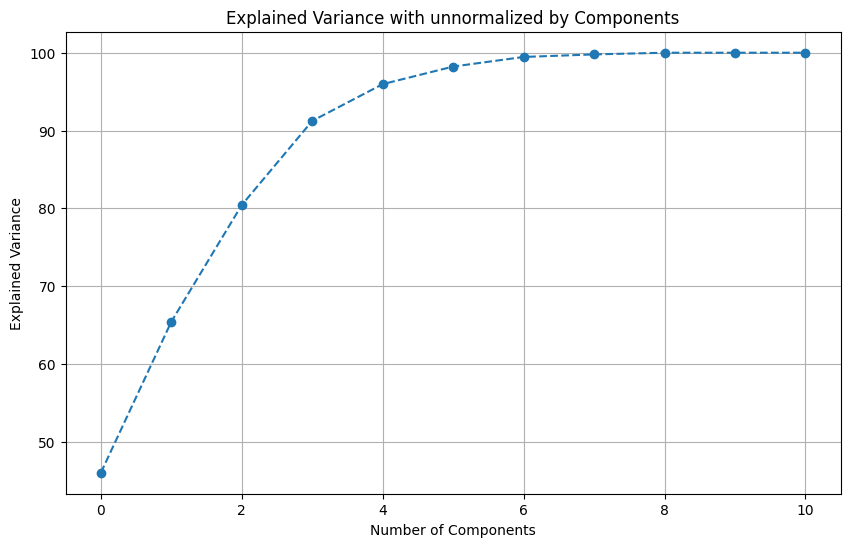

In [287]:
# plot the explained variance
plt.figure(figsize=(10, 6))
cum_var = np.cumsum(explained_variance.values)
plt.plot(cum_var, marker='o', linestyle='--')
plt.title('Explained Variance with unnormalized by Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

In [288]:
# redo with pca with 4 components
pca = PCA(n_components=4, random_state=42)

# Fit and transform the features
X_pca = pca.fit_transform(X)

# Convert to DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, 5)])

# Display the explained variance ratio
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.46008249 0.19414999 0.15001786 0.1080825 ]
0.9123328377233274


In [291]:
y = pd.DataFrame(y)
y

,Fire Alarm
0,-1.027465
1,-1.027465
2,-1.027465
3,-1.027465
4,-1.027465
...,...
881,0.973269
882,0.973269
883,0.973269
884,0.973269


In [292]:
def map_rescaled_to_class(rescaled_value):
    if rescaled_value < 0:
        return 0
    else:
        return 1

# Assuming your rescaled values are stored in a pandas DataFrame called 'y'

# Apply the mapping function to the 'Fire Alarm' column
y['Fire Alarm'] = y['Fire Alarm'].apply(map_rescaled_to_class)
y

,Fire Alarm
0,0
1,0
2,0
3,0
4,0
...,...
881,1
882,1
883,1
884,1


In [293]:
# Separate features and target
X = X_pca_df
# rescaler the data in target
y = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [273]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((708, 4), (178, 4), (708, 1), (178, 1))

In [294]:
y_train

,Fire Alarm
434,1
360,0
355,0
81,0
838,1
...,...
106,0
270,0
860,1
435,1


In [297]:
# it can explain 90% + of the variance
# model with pca 4 components is good

# let do random forest model

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00        85

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



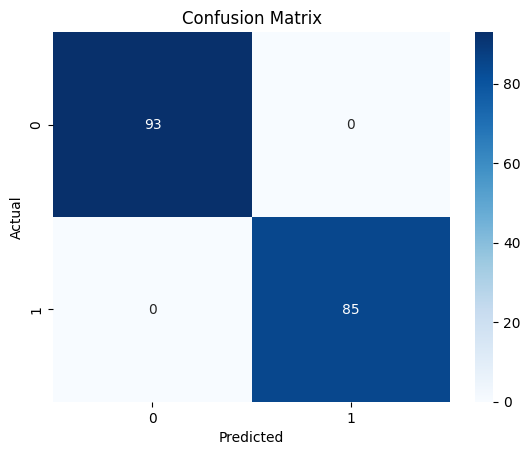

In [296]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [303]:
# it overfitting, let do hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their values to be searched
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the classifier
clf = RandomForestClassifier()

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Fit the model with the best parameters
best_clf = RandomForestClassifier(**best_params)
best_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = best_clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00        85

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [302]:
# Predict on the test set
y_pred = best_clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00        85

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



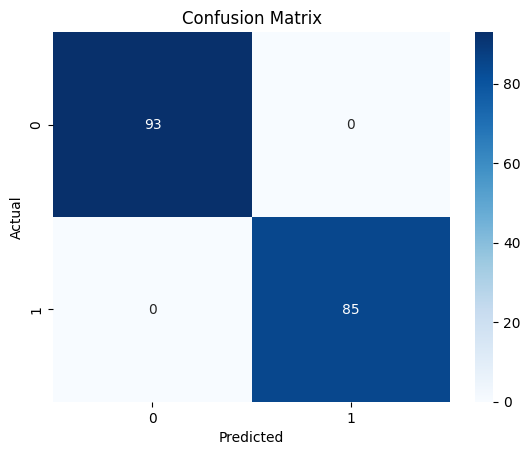

In [299]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [306]:
# save the model
import joblib

# Save the model
joblib.dump(best_clf, 'fire_alarm_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the PCA model
joblib.dump(pca, 'pca.pkl')



['pca.pkl']